In [1]:
## for local developement
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [86]:
import quickgsim as gsim

In [66]:
def visualise_Amatrix(Amat,outFile=None,cmap=None,use_spy=False):
    def get_colormap():
        """ from http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps """
        cdict = {'red': ((0.0, 0.0, 0.0),
                    (0.25, 1.0, 0.7),
                    (0.5, 1.0, 0.0),
                     (1.0, 1.0, 1.0)),
             'green': ((0.0, 0.0, 0.0),
                       (0.25, 1.0, 0.0),
                       (0.5, 1.0, 0.7),
                       (1.0, 1.0, 1.0)),
             'blue': ((0.0, 0.0, 0.0),
                      (0.25, 1.0, 0.0),
                     (0.5, 1.0, 0.0),
                     (1.0, 0.5, 1.0))}
        return plt.matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)

    plt.clf()
    if use_spy:
        plt.spy(Amat,cmap=plt.cm.hot)
        #plt.spy(Amat,cmap=get_colormap())    # with a custom highly segmented map
    else:
        plt.imshow(Amat) #,cmap=get_colormap())
        plt.hot()
    plt.colorbar()

    if outFile:
        plt.savefig(outFile,dpi=600)
    else:
        plt.show()

In [89]:
p = gsim.PedigreePop()

In [13]:
## see https://gsejournal.biomedcentral.com/articles/10.1186/s12711-019-0449-7/figures/1
s,d = p.read_ped_from_file("simplePed.txt",sep=",")

In [14]:
pd.DataFrame(p.get_Amat(p.ped))

,0,1,2,3,4,5,6
0,1.00,0.000,0.000,0.5000,0.5000,0.5000,0.2500
1,0.00,1.000,0.000,0.5000,0.0000,0.2500,0.1250
2,0.00,0.000,1.000,0.0000,0.5000,0.2500,0.6250
3,0.50,0.500,0.000,1.0000,0.2500,0.6250,0.3125
4,0.50,0.000,0.500,0.2500,1.0000,0.6250,0.5625
5,0.50,0.250,0.250,0.6250,0.6250,1.1250,0.6875
6,0.25,0.125,0.625,0.3125,0.5625,0.6875,1.1250


https://gsejournal.biomedcentral.com/articles/10.1186/s12711-019-0449-7/figures/1

In [90]:
s,d = p.read_ped_from_file("simplePed2.txt",sep=",")  #this is from: https://www.journalofdairyscience.org/article/S0022-0302(09)70793-3/fulltext

In [91]:
pd.DataFrame(p.get_Amat(p.ped,method="numba"))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.50,0.000,0.00,0.00,0.2500,0.0000,0.000,0.12500,0.12500
1,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.500,0.00,0.00,0.2500,0.0000,0.000,0.12500,0.12500
2,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.00,0.500,0.00,0.00,0.2500,0.5000,0.000,0.37500,0.12500
3,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.00,0.000,0.50,0.00,0.0000,0.2500,0.250,0.12500,0.12500
4,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.00,0.000,0.00,0.50,0.0000,0.0000,0.250,0.00000,0.12500
5,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.50,0.000,0.00,0.00,0.2500,0.0000,0.000,0.12500,0.12500
6,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.00,0.000,0.50,0.00,0.0000,0.2500,0.250,0.12500,0.12500
7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.00,0.000,0.00,0.50,0.0000,0.0000,0.250,0.00000,0.12500
8,0.500,0.000,0.000,0.000,0.000,0.500,0.000,0.000,1.00,0.000,0.00,0.00,0.5000,0.0000,0.000,0.25000,0.25000
9,0.000,0.500,0.500,0.000,0.000,0.000,0.000,0.000,0.00,1.000,0.00,0.00,0.5000,0.2500,0.000,0.37500,0.25000


In [76]:
## compare numba,python and fortran
p = gsim.PedigreePop()
s,d = p.read_ped_from_file("simplePed2.txt",sep=",")

In [55]:
%timeit p.get_Amat(p.ped,method="numba")

177 µs ± 14.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [56]:
%timeit p.get_Amat(p.ped,method="fortran")

270 µs ± 14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [57]:
%timeit p.get_Amat(p.ped,method="python")

1.42 ms ± 33.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [87]:
## A larger example
p1 = gsim.PedigreePop()
s,d = p1.read_ped_from_file("p4004_treeped.txt",sep=" ")
len(p1.ped)

4235

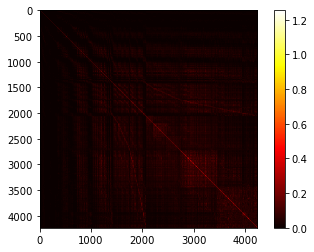

In [79]:
visualise_Amatrix(p1.get_Amat(p1.ped,method="numba"))

In [80]:
%timeit p1.get_Amat(p1.ped,method="numba")

382 ms ± 4.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [81]:
%timeit p1.get_Amat(p1.ped,method="fortran")

127 ms ± 1.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [63]:
%timeit p1.get_Amat(p1.ped,method="python")

1min 18s ± 4.38 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [88]:
## Try now the core-ped to asee reductions
coreped,s1,d1 = p1.core_ped(s.union(d))

Will reduce pedigree size of 4235 by keeping only the 2054 parents provided
redcuded pedigree has now 2054 animals coming from 392 sires and 1029 dams


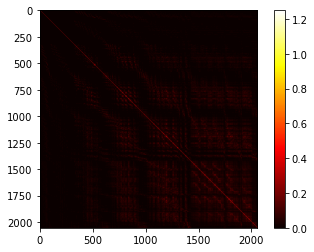

In [85]:
visualise_Amatrix(p1.get_Amat(coreped,method="numba"))